<a href="https://colab.research.google.com/github/abhaswanchu1/mids-281-final-project-cars/blob/Abhas-Work/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
##############################################################################################
########################  Load Images  ########################################################
##############################################################################################
# Load the train and test data
X_train_pca = np.load(r"drive/MyDrive/X.npy")
X_test_pca = np.load(r"drive/MyDrive/X_test.npy")
Y_train = np.load(r"drive/MyDrive/targets.npy")
Y_test = np.load(r"drive/MyDrive/test_targets.npy")
X_train = np.load(r'drive/MyDrive/stacked_features.npy')
X_test = np.load(r'drive/MyDrive/stacked_features_test.npy')


Training time: 13.18 seconds
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
Weighted F1-score: 0.91


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


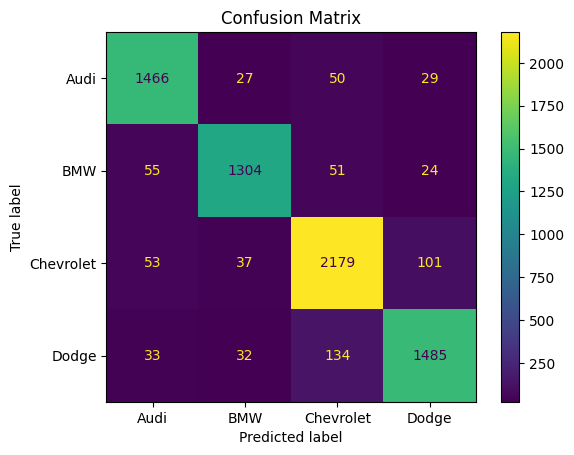

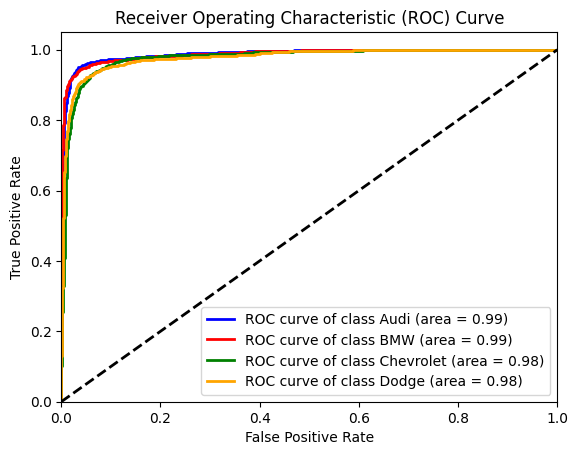

In [6]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Start the timer
start_time = time.time()

# Assuming you have X_train_pca, Y_train loaded
# Create and train the Logistic Regression model
model.fit(X_train_pca, Y_train)

# End the timer
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions
Y_pred = model.predict(X_train_pca)

# Calculate classification metrics
accuracy = accuracy_score(Y_train, Y_pred)
precision = precision_score(Y_train, Y_pred, average='weighted')
recall = recall_score(Y_train, Y_pred, average='weighted')
f1 = f1_score(Y_train, Y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Weighted F1-score: {f1:.2f}")

# Display confusion matrix with class labels
cm = confusion_matrix(Y_train, Y_pred)
# Assuming your class labels are 0, 1, 2, etc.
class_names = np.unique(Y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Plot AUC ROC curve (for multi-class)
Y_train_bin = label_binarize(Y_train, classes=np.unique(Y_train))
n_classes = Y_train_bin.shape[1]
Y_pred_prob = model.predict_proba(X_train_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_train_bin[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(np.unique(Y_train)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.39
Test Precision: 0.39
Test Recall: 0.39
Test Weighted F1-score: 0.39


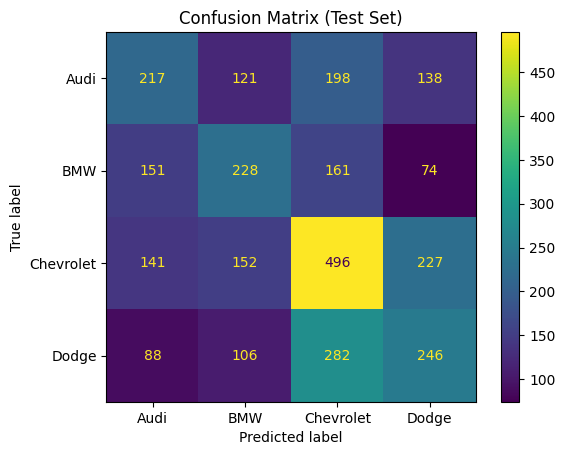

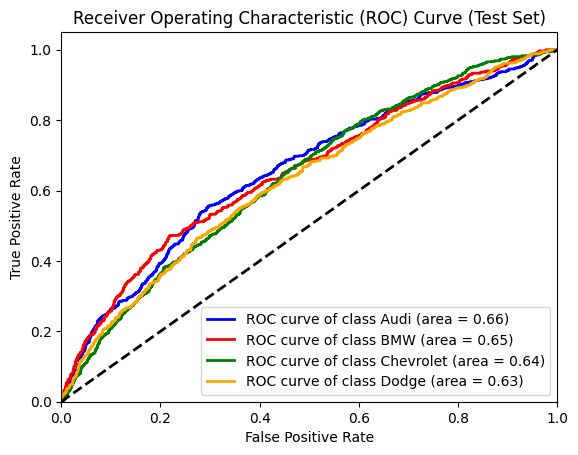

In [7]:
Y_pred_test = model.predict(X_test_pca)


# Calculate classification metrics for the test set
accuracy_test = accuracy_score(Y_test, Y_pred_test)
precision_test = precision_score(Y_test, Y_pred_test, average='weighted')
recall_test = recall_score(Y_test, Y_pred_test, average='weighted')
f1_test = f1_score(Y_test, Y_pred_test, average='weighted')

print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}")
print(f"Test Weighted F1-score: {f1_test:.2f}")

# Display confusion matrix for the test set
cm_test = confusion_matrix(Y_test, Y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
disp_test.plot()
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Plot AUC ROC curve for the test set (for multi-class)
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_bin.shape[1]
Y_pred_prob_test = model.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_prob_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(np.unique(Y_test)[i], roc_auc_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

Training time: 20.12 seconds
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


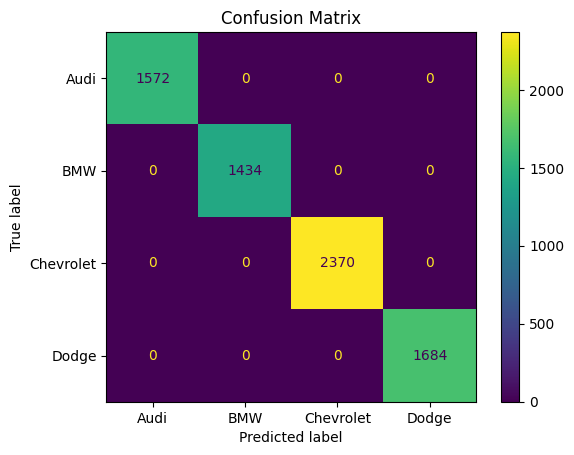

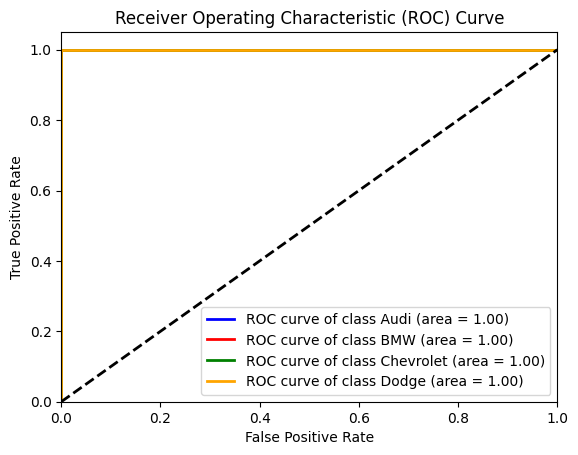

In [8]:
# Start the timer
start_time = time.time()

# Create and train the Logistic Regression model using X_train
model_full = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model_full.fit(X_train, Y_train)

# End the timer
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions using X_train
Y_pred = model_full.predict(X_train)

# Calculate classification metrics
accuracy = accuracy_score(Y_train, Y_pred)
precision = precision_score(Y_train, Y_pred, average='weighted')
recall = recall_score(Y_train, Y_pred, average='weighted')
f1 = f1_score(Y_train, Y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Display confusion matrix
cm = confusion_matrix(Y_train, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Plot AUC ROC curve (for multi-class)
Y_train_bin = label_binarize(Y_train, classes=np.unique(Y_train))
n_classes = Y_train_bin.shape[1]
Y_pred_prob = model_full.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_train_bin[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(np.unique(Y_train)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.41
Test Precision: 0.42
Test Recall: 0.41
Test Weighted F1-score: 0.41


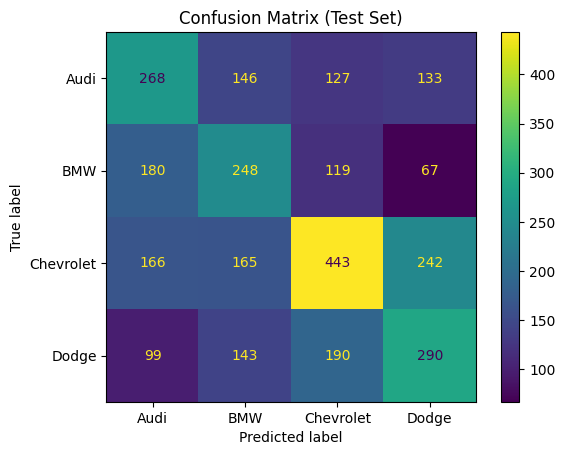

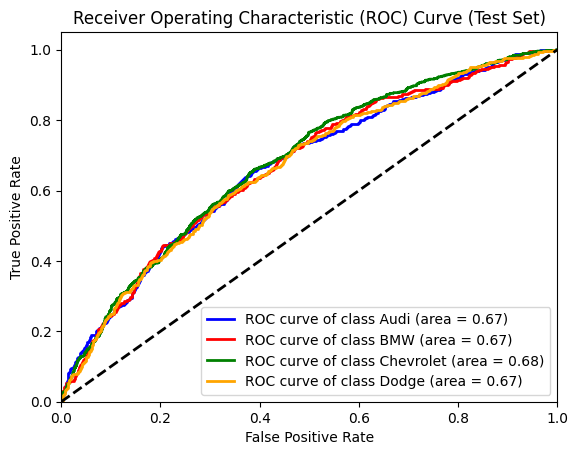

In [9]:
# Make predictions on the test set using model_full
Y_pred_test = model_full.predict(X_test)


# Calculate classification metrics for the test set
accuracy_test = accuracy_score(Y_test, Y_pred_test)
precision_test = precision_score(Y_test, Y_pred_test, average='weighted')
recall_test = recall_score(Y_test, Y_pred_test, average='weighted')
f1_test = f1_score(Y_test, Y_pred_test, average='weighted')

print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}")
print(f"Test Weighted F1-score: {f1_test:.2f}")

# Display confusion matrix for the test set
cm_test = confusion_matrix(Y_test, Y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
disp_test.plot()
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Plot AUC ROC curve for the test set (for multi-class)
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_bin.shape[1]
Y_pred_prob_test = model_full.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_prob_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(np.unique(Y_test)[i], roc_auc_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()